# WEEK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium

%matplotlib inline

In [2]:
building_permits = pd.read_csv('../data/Building_Permits_Issued.csv', low_memory = False)

In [3]:
building_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,W/S HILLSBORO PK. & N/S ABBOTT MARTIN RD.,"BATTINO CONTRACTING SOLUTIONS, LLC",CACR,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,01/03/2017,01/09/2017,268107.0,704 ABERCORN CT,ANTIOCH,TN,37013,LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042..."


In [4]:
building_permits.tail(7)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
34467,2017062064,Building Residential - Addition,Single Family Residence,07209025900,09/25/2017,09/25/2017,57452.0,1001 FAIRWIN AVE,NASHVILLE,TN,37216,LOT 21 ESKRIDGE SUB,DOTSON GROUP LLC,CARA,CAA01R301,3408732,to construct 510SF addition to the rear of exi...,5.0,37011400.0,"1001 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.199..."
34468,2017080442,Building Residential - Addition,Single Family Residence,13004005000,12/18/2017,01/08/2018,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,PT LOT 4 BELLEMEADE ANNEX,VAN MOL RESTORATION LLC,CARA,CAA01R301,3433097,Remodel Kitchen. Open back wall of home to add...,34.0,37017902.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397..."
34469,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,PT LOT 2 ROLLING ACRES,"ALFORD BUILDERS, LLC",CARA,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34470,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,LOT 25 BLK C CRITTENDEN EST,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34471,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,LOTS 18 19 PT 20 BLK A EDENWOLD CITY SUB,sergy motorny,CACR,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34472,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,PT LOT 15 ORIGINAL TOWN OF NASHVILLE,GENERAL SIGN SERVICES,CASN,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."
34473,2018059022,Building Residential - New,Single Family Residence,163020C32000CO,09/17/2018,09/26/2018,140813.0,1382 RURAL HILL RD 320,ANTIOCH,TN,37013,UNIT 320 AUTUMN RIDGE TOWNHOMES 3RD AMEND,R J YORK HOMES LLC,CARN,CAA01R301,3560019,TO CONSTRUCT A NEW SINGLE FAMILY UNIT AT 1250 ...,32.0,37015628.0,"1382 RURAL HILL RD 320\nANTIOCH, TN 37013\n(36..."


In [5]:
building_permits.shape

(34474, 20)

In [6]:
building_permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Subdivision / Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Tracking #', 'Purpose', 'Council District',
       'Census Tract', 'Mapped Location'],
      dtype='object')

In [7]:
keep_cols = ['Permit #',
'Permit Type Description',
'Permit Subtype Description',
'Parcel',
'Date Entered',
'Date Issued',
'Construction Cost',
'Address',
'City',
'State',
'ZIP',
'Contact',
'Purpose',
'Council District',]

In [8]:
building_permits = building_permits[keep_cols]

In [9]:
rename_cols = [
    'number',
    'type_desc',
    'subtype_desc',
    'parcel',
    'date_entered',
    'date_issued',
    'cost',
    'address',
    'city',
    'state',
    'zip_code',
    'contact',
    'purpose',
    'council_district',
]

In [10]:
building_permits.columns = rename_cols

In [11]:
building_permits['contact'].value_counts()

SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    3061
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      746
OLE SOUTH PROPERTIES INC                                    601
NVR, INC. T/A RYAN HOMES                                    581
JOSLIN SIGN & MAINTENANCE CO INC                            520
                                                           ... 
kimberly sansom                                               1
FUEL TANK MAINTENANCE CO LLC                                  1
WIGGINS, APRIL                                                1
Zack Nofal                                                    1
ROOF ROOF NASHVILLE, LLC                                      1
Name: contact, Length: 4555, dtype: int64

OLE SOUTH PROPERTIES INC, 601

In [12]:
description_counts = building_permits['type_desc'].value_counts().reset_index()
description_counts.columns = ['type_desc', 'type_desc_count']

In [13]:
sum(description_counts[description_counts['type_desc'].str.contains('Residential')]['type_desc_count']) > sum(description_counts[description_counts['type_desc'].str.contains('Commercial')]['type_desc_count'])


True

In [14]:
sum(description_counts[description_counts['type_desc'].str.contains('Residential')]['type_desc_count'])

20396

In [15]:
sum(description_counts[description_counts['type_desc'].str.contains('Commercial')]['type_desc_count'])

6574

In [16]:
sum(description_counts[(~description_counts['type_desc'].str.contains('Residential'))&(~description_counts['type_desc'].str.contains('Commercial'))]['type_desc_count'])

7504

In [30]:
# easier method would be to just use pd.to_datetime()
building_permits['month_entered'] = building_permits['date_entered'].str.split('/').str[0].astype(int)

In [31]:
month_count = building_permits['month_entered'].value_counts().sort_index()

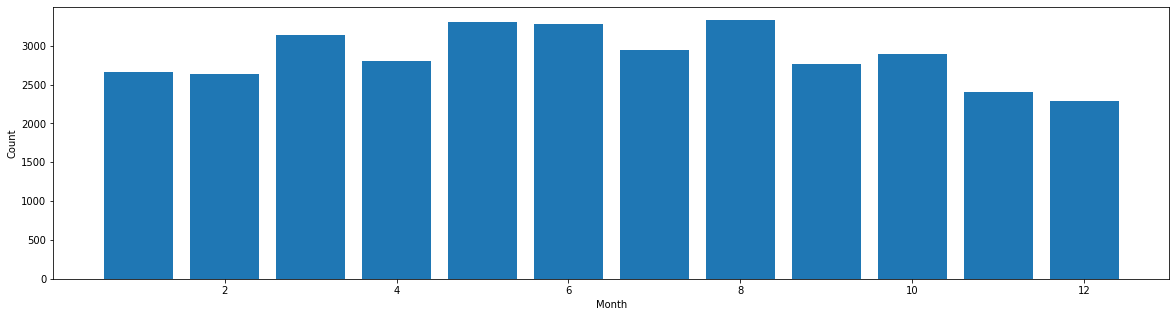

In [33]:
plt.figure(figsize = (20, 5))
plt.bar(month_count.index, month_count)
plt.xlabel('Month')
plt.ylabel('Count');

---
# WEEK 2

In [20]:
building_permits['date_entered'] = pd.to_datetime(building_permits['date_entered'])
building_permits['date_issued'] = pd.to_datetime(building_permits['date_issued'])

In [21]:
building_permits['lapse'] = building_permits['date_issued'] - building_permits['date_entered']

In [22]:
max(building_permits['lapse'])

Timedelta('3371 days 00:00:00')

In [23]:
min(building_permits['lapse'])

Timedelta('0 days 00:00:00')

In [24]:
len(building_permits[(building_permits['date_issued'].dt.month == 9)&(building_permits['date_issued'].dt.year == 2019)])

962

In [25]:
building_permits['year'] = building_permits['date_issued'].dt.year

In [26]:
building_permits['year'].unique()

array([2019, 2017, 2018, 2016])

In [27]:
building_permits_2019 = building_permits[building_permits['year'] == 2019]

In [28]:
building_permits_2019_zip_gb = building_permits_2019.groupby('zip_code').count().reset_index().iloc[:,:2]

In [29]:
building_permits_2019_zip_gb.columns = ['zip_code', 'zip_count']
building_permits_2019_zip_gb['zip_code'] = building_permits_2019_zip_gb['zip_code'].astype(str)

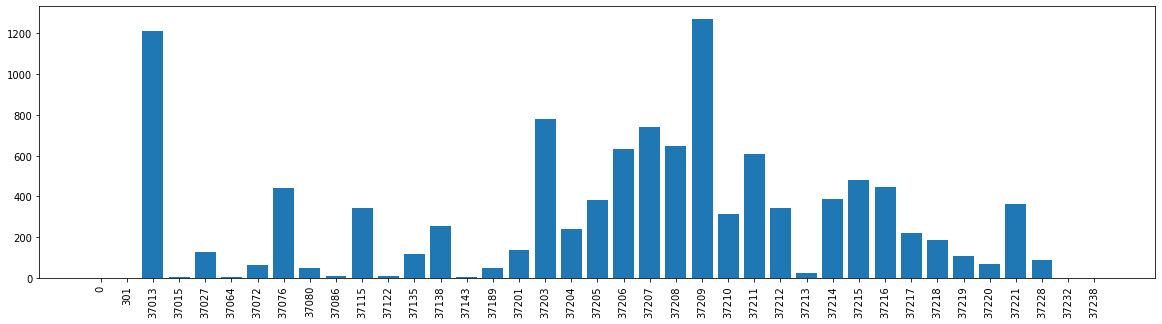

In [30]:
plt.figure(figsize = (20, 5))
plt.bar(building_permits_2019_zip_gb['zip_code'], building_permits_2019_zip_gb['zip_count'])
plt.xticks(rotation = 90);

In [31]:
short_term_rental_permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')

In [32]:
short_term_rental_permits = short_term_rental_permits[['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description', 'Permit Status', 'Parcel', 'Date Entered', 'Date Issued', 'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Purpose', 'Permit Owner Name', 'Permit Type', 'Council District']]

In [33]:
short_term_rental_permits.columns =['id', 'applicant', 'contact', 'subtype_desc', 'status', 'parcel', 'entered', 'issued',  'expiration', 'address', 'city', 'state', 'zip_code', 'purpose', 'permit_owner_name', 'type', 'council_district']

In [34]:
short_term_rental_permits['issued'] = pd.to_datetime(short_term_rental_permits['issued'])

In [35]:
strp_2019 = short_term_rental_permits[(short_term_rental_permits['issued'] <= max(building_permits_2019['date_issued']))&
                                                      (short_term_rental_permits['issued'] >= min(building_permits_2019['date_issued']))]

In [36]:
strp_2019_zip_gb = strp_2019.groupby('zip_code').count().reset_index().iloc[:,:2]
strp_2019_zip_gb.columns = ['zip_code', 'zip_count']
strp_2019_zip_gb['zip_code'] = strp_2019_zip_gb['zip_code'].astype(str)

In [37]:
strp_2019_zip_gb['permit_type'] = 'short_term_rental'
building_permits_2019_zip_gb['permit_type'] = 'building'

In [38]:
building_strp_2019 = pd.concat([building_permits_2019_zip_gb, strp_2019_zip_gb])

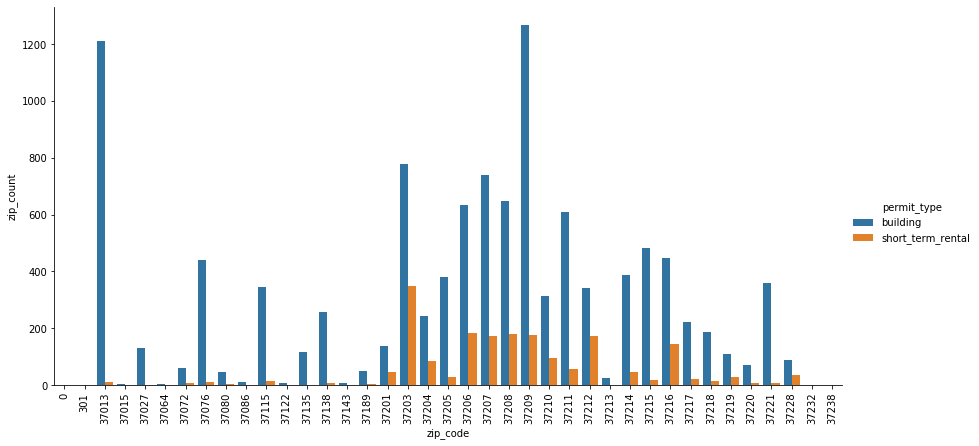

In [39]:
g = sns.catplot(x="zip_code", y="zip_count", hue="permit_type", data=building_strp_2019, kind="bar", height = 6, aspect = 2)
plt.xticks(rotation = 90);

In [40]:
building_strp_merge = building_permits.merge(short_term_rental_permits, how = 'inner', on = 'parcel')

In [41]:
len(building_strp_merge)

6290

In [42]:
# strp happened before build
len(building_strp_merge[building_strp_merge['date_issued'] > building_strp_merge['issued']])

1623

In [43]:
# strp happened after build
len(building_strp_merge[building_strp_merge['date_issued'] < building_strp_merge['issued']])

4050

In [44]:
# 617 happened at the same time
6290-(4050+1623)

617

In [82]:
building_strp_2019

,zip_code,zip_count,permit_type
0,0,2,building
1,301,1,building
2,37013,1212,building
3,37015,3,building
4,37027,129,building
...,...,...,...
25,37218,14,short_term_rental
26,37219,28,short_term_rental
27,37220,7,short_term_rental
28,37221,6,short_term_rental


In [45]:
# strp usually happens before build, but not by a huge amount

In [46]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
nash_map

In [47]:
db = '../data/stations.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('fire_stations',)]


In [48]:
fire_stations = pd.read_sql_query("SELECT * FROM fire_stations", con)

In [49]:
fire_stations.head()

,district,station_number,address,city,state,lat,lng
0,1,Station 30,3705 Old Clarksville Pike,Joelton,TN,36.316384,-86.876877
1,2,Station 24,3851 Clarksville Highway,Nashville,TN,36.203627,-86.840622
2,2,Station 25,2589 Whites Creek Pike,Nashville,TN,36.215851,-86.801616
3,8,Station 1,130 Broadmoor Avenue,Nashville,TN,36.229579,-86.757426
4,8,Station 31,415 Douglas Avenue,Madison,TN,36.259135,-86.716084


In [50]:
fire_stations.shape

(38, 7)

In [55]:
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
for ind, row in fire_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point, popup=row['district']).add_to(nash_map)
nash_map

In [52]:
db = '../data/multi_table.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('permits_2018',), ('resident_survey_2018',), ('station_dist',), ('strp_2018',)]


In [53]:
fire_council_survey = pd.read_sql_query("SELECT station_dist.district, station_dist.station_number, resident_survey_2018.fire_and_ems__overall, resident_survey_2018.fire_services, resident_survey_2018.fire_response_time, resident_survey_2018.fire_professionalism FROM strp_2018 INNER JOIN resident_survey_2018 ON resident_survey_2018.zip_code = strp_2018.zip LEFT JOIN station_dist ON station_dist.district = strp_2018.council_district", con)

"SELECT station_dist.district, station_dist.station_number, resident_survey_2018.fire_and_ems__overall, resident_survey_2018.fire_services, resident_survey_2018.fire_response_time, resident_survey_2018.fire_professionalism
FROM strp_2018
INNER JOIN resident_survey_2018 ON resident_survey_2018.zip_code = strp_2018.zip
LEFT JOIN station_dist ON station_dist.district = strp_2018.council_district"

In [54]:
fire_council_survey.drop_duplicates('district').sort_values('district')

,district,station_number,fire_and_ems__overall,fire_services,fire_response_time,fire_professionalism
255,1.0,['Station 30'],Satisfied,Satisfied,Satisfied,Satisfied
149,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Don't Know,Don't Know
96,3.0,['Station 39'],Very Satisfied,Don't Know,Don't Know,Don't Know
306,4.0,[],Very Satisfied,Satisfied,Satisfied,Satisfied
0,5.0,['Station 3'],Satisfied,Satisfied,Don't Know,Don't Know
23,6.0,['Station 14'],Satisfied,Satisfied,Satisfied,Don't Know
3,7.0,['Station 29' 'Station 18'],Satisfied,Neutral,Satisfied,Very Satisfied
6,8.0,['Station 1' 'Station 31'],Satisfied,Neutral,Satisfied,Very Satisfied
22,9.0,['Station 38'],Satisfied,Satisfied,Neutral,Don't Know
401,10.0,[],Satisfied,Satisfied,Neutral,Don't Know
